<a href="https://colab.research.google.com/github/Manikethan38/WATER-QUALITY-PREDICTION/blob/main/WATER_QUALITY_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT PRESENTATION LINK :

#https://drive.google.com/file/d/13YodCOwuNecJKwuAqgCJiAqX-Xzz7Qj0/view?usp=sharing

#Librarys

In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

#Data Preprocessing

In [ ]:
#@title
a=pd.read_excel("waterQuality1.xlsx")
a

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [ ]:
#@title
np.sum(a.isna())

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

Found null values in Ammonia and Is_safe

In [ ]:
#@title
data=pd.read_excel("WaterQuality.xlsx")
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
#@title
np.sum(data.isna())

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Found no null values

In [ ]:
#@title
data.describe

<bound method NDFrame.describe of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrate

In [ ]:
#@title
data.nunique()

aluminium       495
ammonia        2563
arsenic         107
barium          480
cadmium          23
chloramine      812
chromium         91
copper          201
flouride        151
bacteria        101
viruses          61
lead            200
nitrates       1803
nitrites        280
mercury          11
perchlorate    2999
radium          735
selenium         11
silver           51
uranium          10
is_safe           2
dtype: int64

#EDA

In [ ]:
#@title
data.groupby('is_safe')['is_safe'].count()

is_safe
0    7084
1     912
Name: is_safe, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


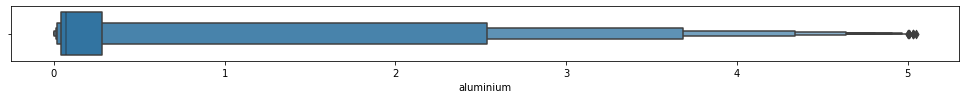

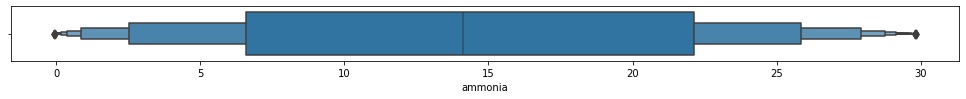

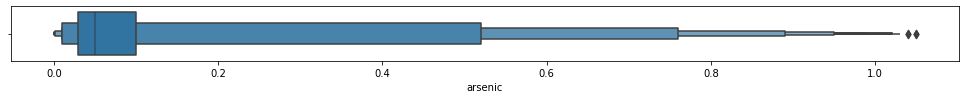

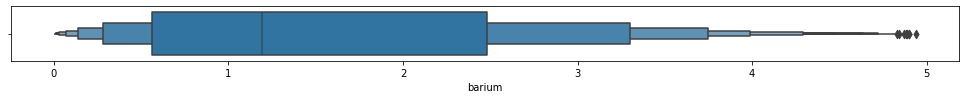

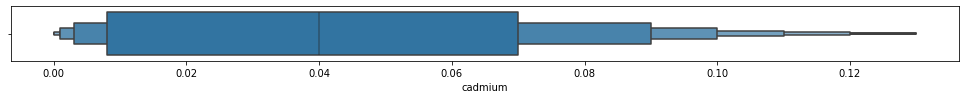

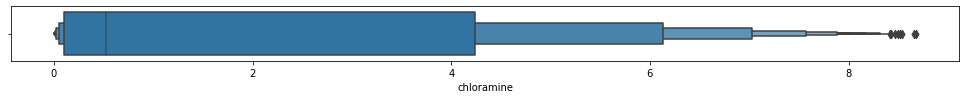

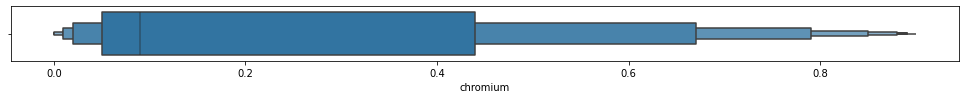

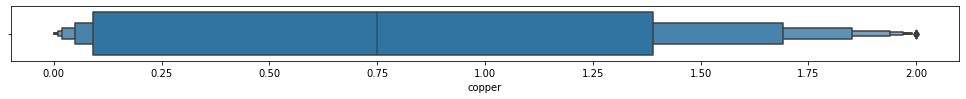

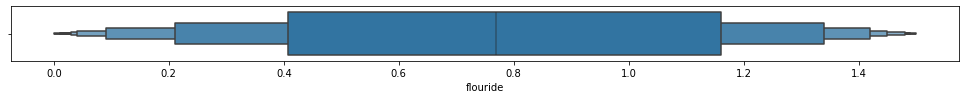

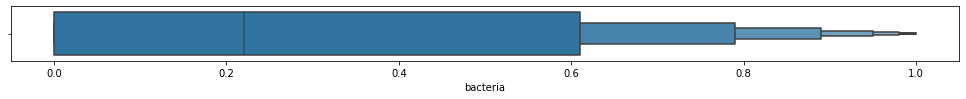

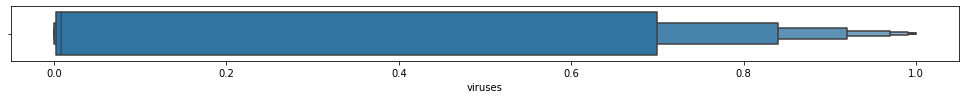

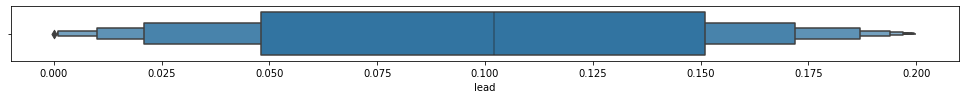

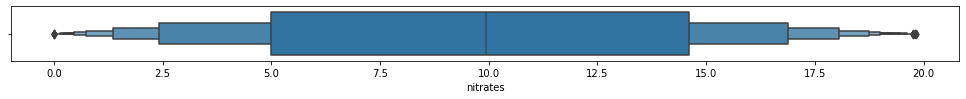

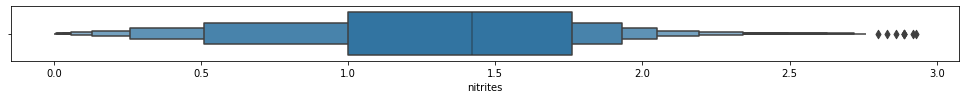

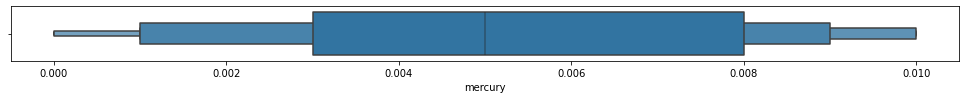

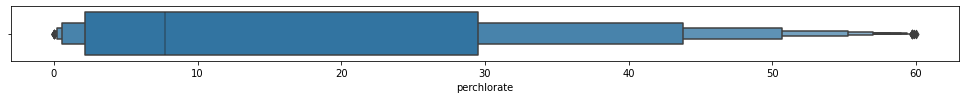

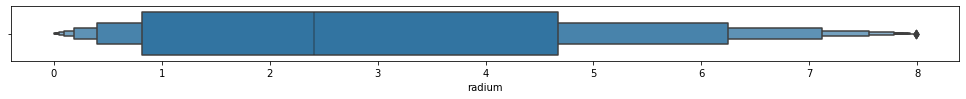

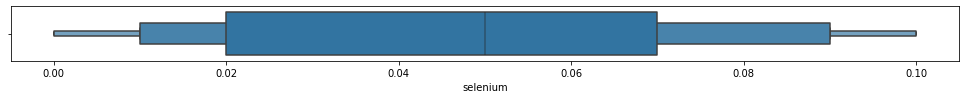

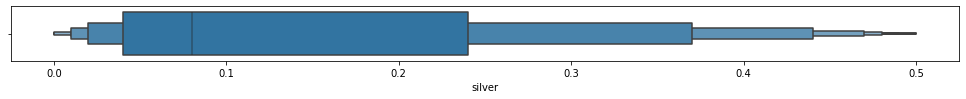

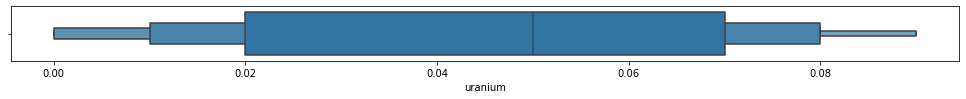

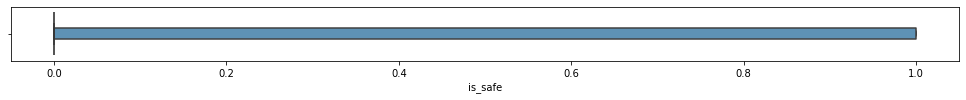

In [ ]:
#@title
import matplotlib.pyplot as plt

for column in data:
        plt.figure(figsize=(17,1))
        sns.boxenplot(data=data, x=column)

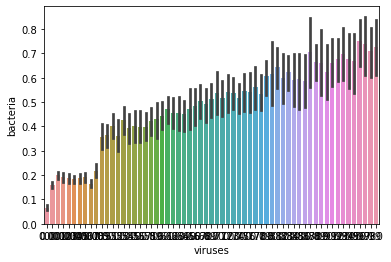

In [ ]:
#@title
sns.barplot(x='viruses',y='bacteria',data=a)

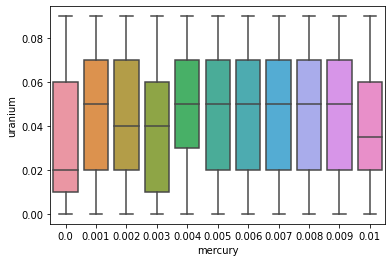

In [ ]:
#@title
sns.boxplot(x="mercury",y="uranium",data=a)

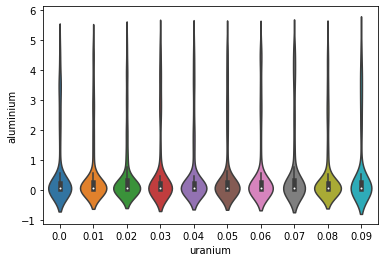

In [ ]:
#@title
sns.violinplot(x="uranium",y="aluminium",data=a)

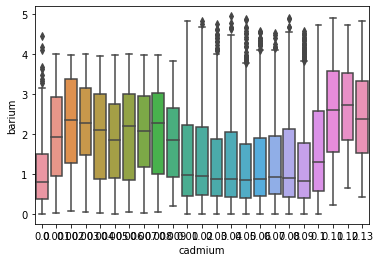

In [ ]:
#@title
sns.boxplot(x="cadmium",y="barium" , data=a);

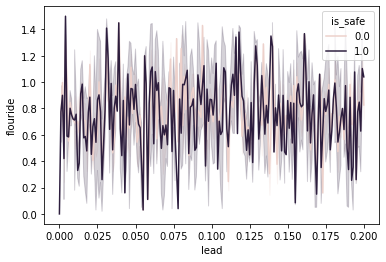

In [ ]:
#@title
sns.lineplot(x="lead",y="flouride" , data=a,hue="is_safe");

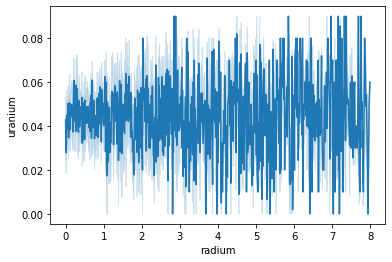

In [ ]:
#@title
sns.lineplot(x="radium",y="uranium" , data=a);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


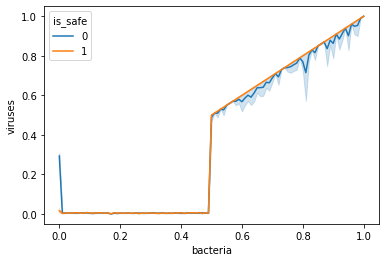

In [ ]:
#@title
sns.lineplot('bacteria','viruses', data=data, hue='is_safe');

In [ ]:
#@title
water=data.groupby("cadmium")['is_safe'].mean()

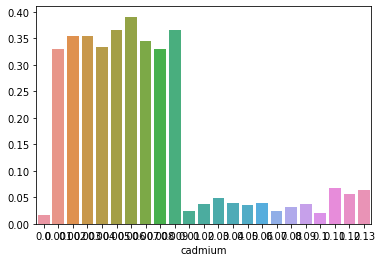

In [ ]:
#@title
sns.barplot(x=water.index,y=water.values,data=data)

In [ ]:
#@title
water=data.groupby("uranium")['is_safe'].count()

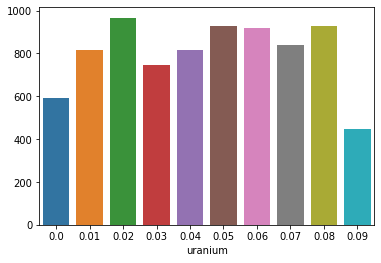

In [ ]:
#@title
sns.barplot(x=water.index,y=water.values,data=data)

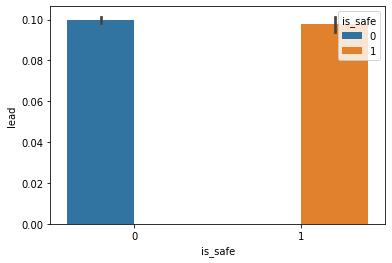

In [ ]:
#@title
sns.barplot(x="is_safe",y="lead",data=data,hue='is_safe')

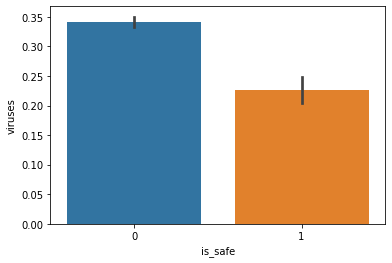

In [ ]:
#@title
sns.barplot(x="is_safe",y="viruses",data=data)

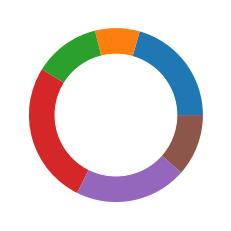

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randint(20, 100, 6)
plt.pie(data)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [ ]:
#@title
t=data.is_safe.value_counts()

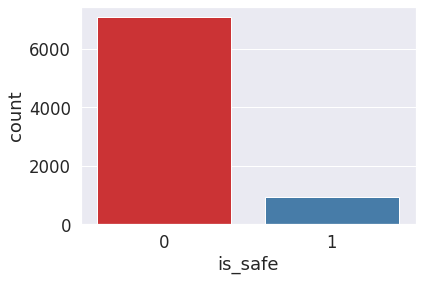

In [ ]:
#@title
sns.set(font_scale=1.5)
countplt=sns.countplot(x='is_safe', data=data, palette ='Set1')
plt.show()

In [ ]:
#@title
corr_matrix = data.corr()
print(corr_matrix)

             aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.067369  0.225725  0.294091 -0.099902    0.369221   
ammonia       0.067369  1.000000  0.046783  0.070099 -0.006422    0.104775   
arsenic       0.225725  0.046783  1.000000  0.362925  0.334782    0.356509   
barium        0.294091  0.070099  0.362925  1.000000 -0.037901    0.446869   
cadmium      -0.099902 -0.006422  0.334782 -0.037901  1.000000   -0.144366   
chloramine    0.369221  0.104775  0.356509  0.446869 -0.144366    1.000000   
chromium      0.353134  0.124782  0.312421  0.415937 -0.157716    0.555846   
copper        0.168569  0.015953 -0.036488  0.065277 -0.109252    0.118975   
flouride     -0.009877 -0.028221  0.003731 -0.018637  0.005005    0.004254   
bacteria     -0.078324  0.063603  0.035642  0.101304 -0.092133    0.154443   
viruses      -0.071040  0.105856  0.011596 -0.002429  0.021255    0.003432   
lead          0.020957 -0.037065 -0.087669 -0.042829 -0.035313  

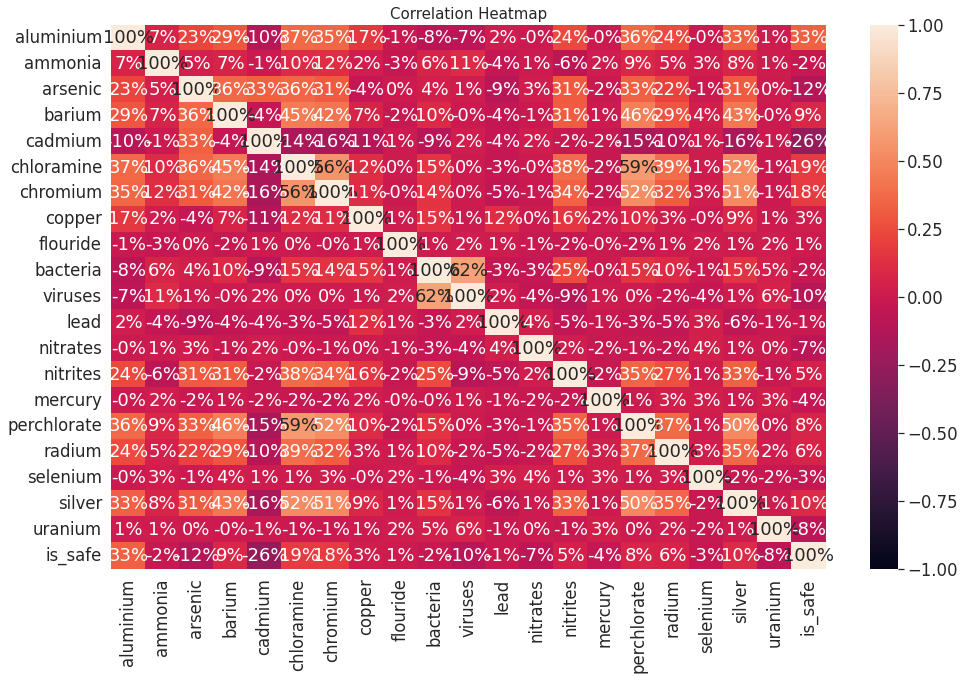

In [ ]:
#@title
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='0.0%')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

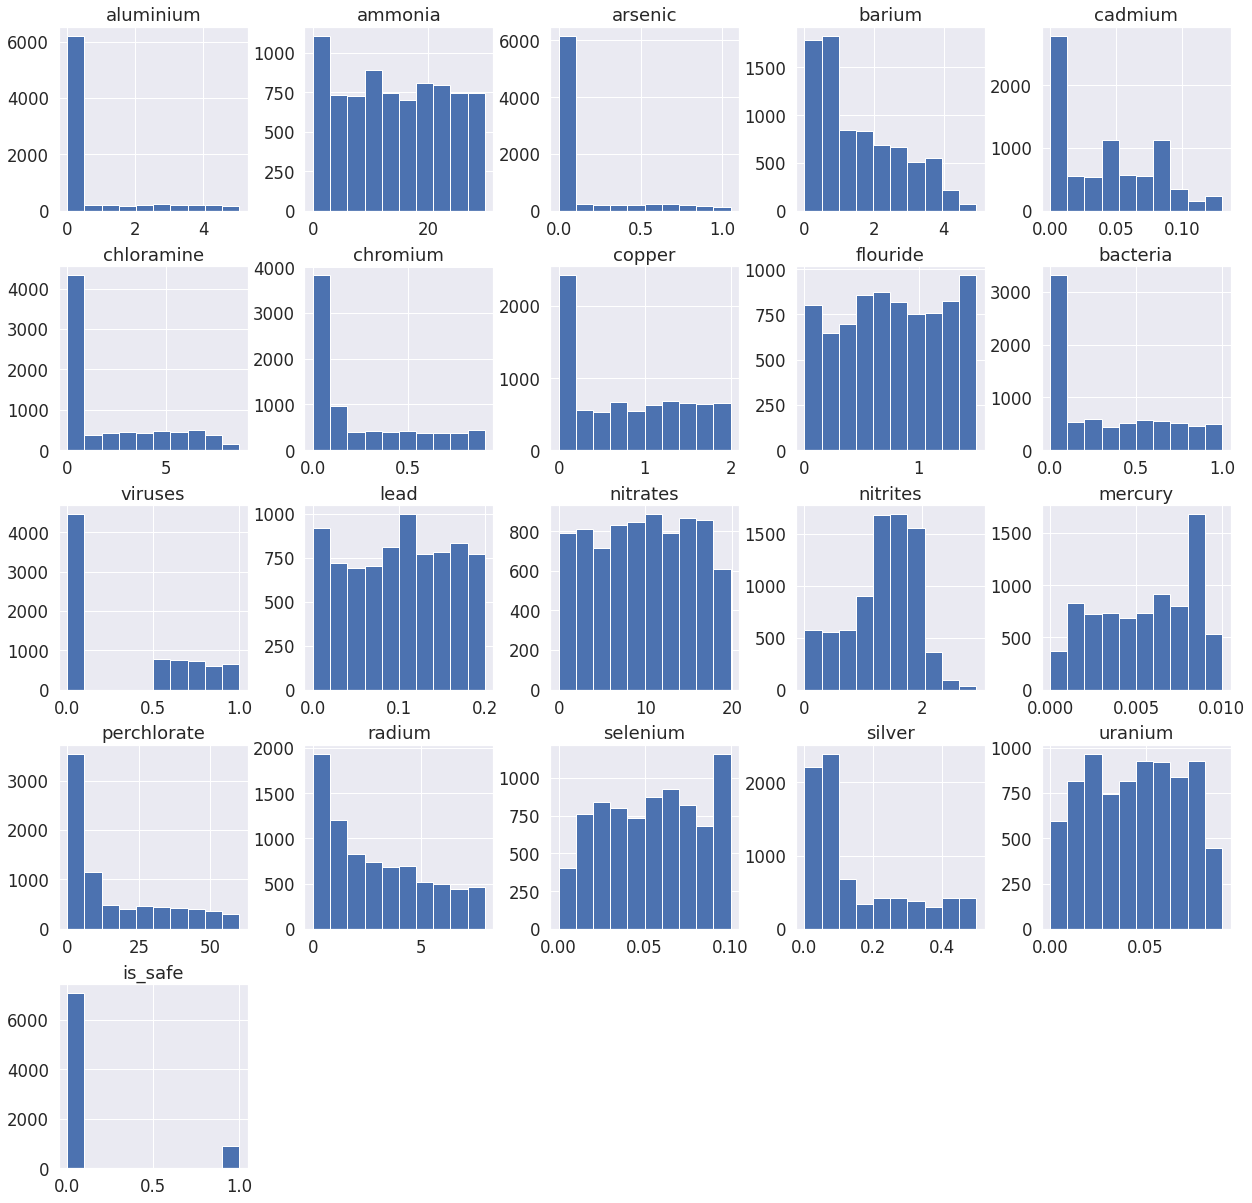

In [ ]:
#@title
data.hist(figsize=(21,21))
plt.show()

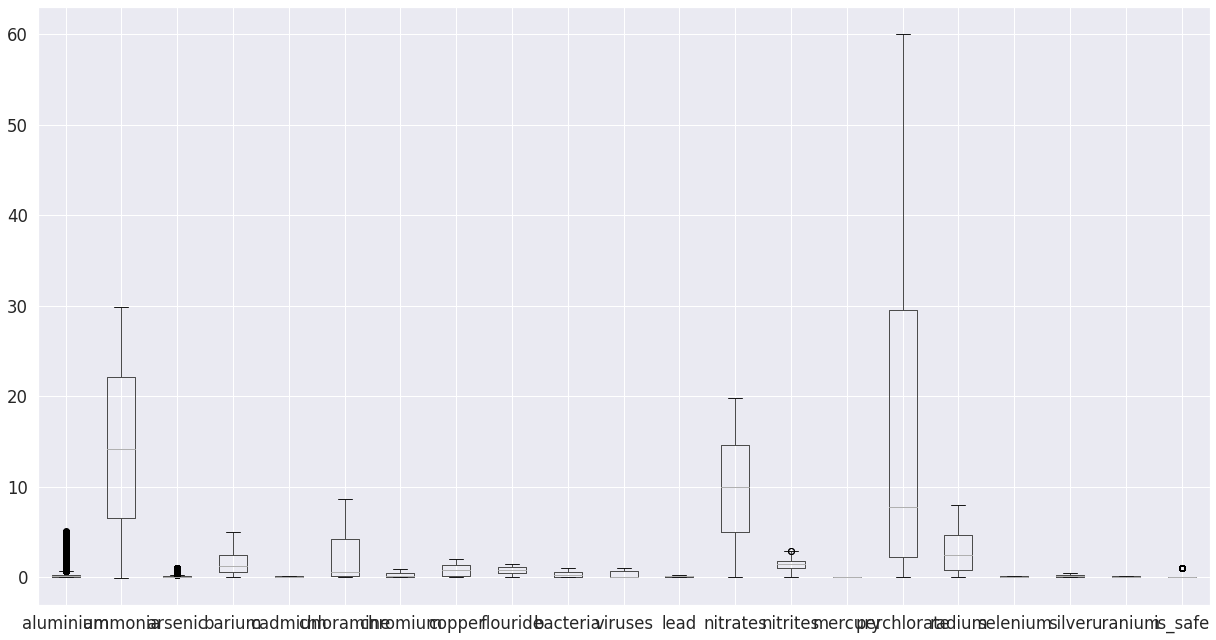

In [ ]:
#@title
data.boxplot(figsize=(21,11))

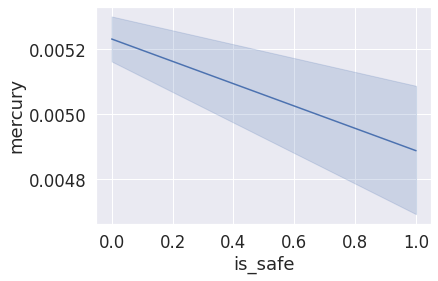

In [ ]:
#@title
sns.lineplot(x="is_safe",y="mercury",data=data)

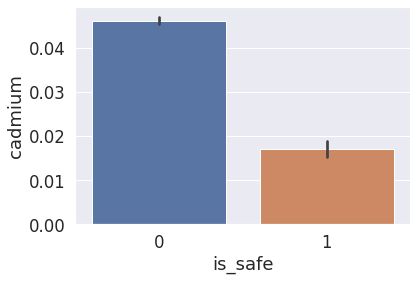

In [ ]:
#@title
sns.barplot(x="is_safe",y="cadmium",data=data)

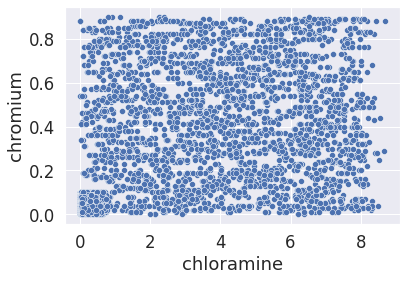

In [ ]:
#@title
sns.scatterplot(x="chloramine",y="chromium",data=data)

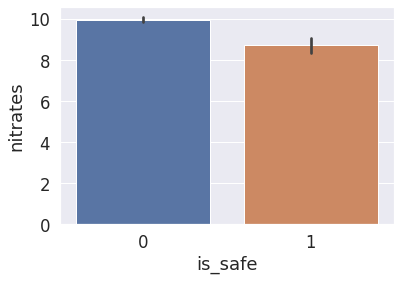

In [ ]:
#@title
sns.barplot(x="is_safe",y="nitrates",data=data)

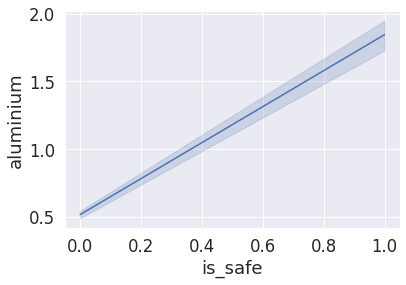

In [ ]:
#@title
sns.lineplot(x="is_safe",y="aluminium",data=data)

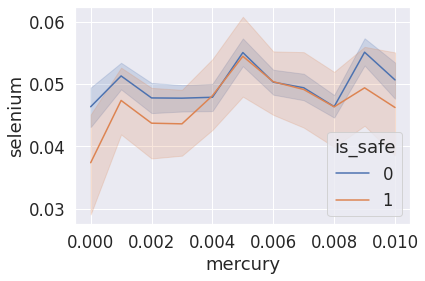

In [ ]:
#@title
sns.lineplot(x="mercury",y="selenium",data=data,hue="is_safe")

#Logistic Regression

In [ ]:
#@title
x= data.drop("is_safe", axis=1)
y=data["is_safe"]
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

Train and Test ratio (80-20)

In [ ]:
#@title
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .80)

In [ ]:
#@title
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000000000.0)

In [ ]:
#@title
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#@title
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.046570030252414796

In [ ]:
#@title
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.895

Train and Test ratio (75-25)

In [ ]:
#@title
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [ ]:
#@title
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000000000.0)

In [ ]:
#@title
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#@title
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0526356507893726

In [ ]:
#@title
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.894447223611806

Train and Test ratio (70-30)

In [ ]:
#@title
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .70)

In [ ]:
#@title
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000000000.0)

In [ ]:
#@title
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#@title
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.07887671603435464

In [ ]:
#@title
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8891204668611922

#Neural Network 

In [ ]:
#@title
x= data.drop("is_safe", axis=1)
y=data['is_safe']
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

In [ ]:
#@title
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

5488    0
2577    0
3692    1
7465    0
7563    0
       ..
6574    0
1115    0
7162    0
6734    0
1467    0
Name: is_safe, Length: 1600, dtype: int64

In [ ]:
#@title
import tensorflow as tf

In [ ]:
#@title
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([     tf.keras.layers.Dense(15, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')])

# STEP1: Fit the model

a= model.fit(x_train, y_train, epochs=100,verbose=0)

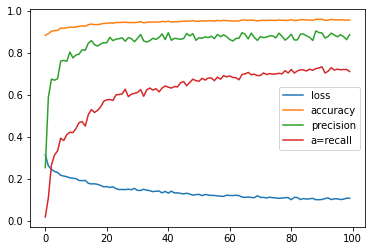

In [ ]:
#@title
pd.DataFrame(a.history).plot()

In [ ]:
#@title
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9581 - precision: 0.8800 - a=recall: 0.7700


[0.14263755083084106,
 0.9581249952316284,
 0.8799999952316284,
 0.7699999809265137]

In [ ]:
#@title
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([     tf.keras.layers.Dense(14, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')])

# STEP1: Fit the model

a= model.fit(x_train, y_train, epochs=500,verbose=0)

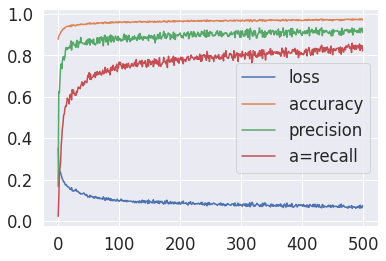

In [ ]:
#@title
pd.DataFrame(a.history).plot()

In [ ]:
#@title
model.evaluate(x_test, y_test)

50/50 [==============================] - 1s 2ms/step - loss: 0.1956 - accuracy: 0.9581 - precision: 0.8715 - a=recall: 0.7800


[0.19556105136871338,
 0.9581249952316284,
 0.8715083599090576,
 0.7799999713897705]

#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model = BaggingClassifier(
base_estimator=BaggingClassifier(),
n_estimators=1000,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
x= data.drop("is_safe", axis=1)
y=data['is_safe']
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

5488    0
2577    0
3692    1
7465    0
7563    0
       ..
6574    0
1115    0
7162    0
6734    0
1467    0
Name: is_safe, Length: 1600, dtype: int64

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
l.score(x_test,y_test)

0.958125

#Boosting

In [ ]:
#gradientBoosting
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
x= data.drop("is_safe", axis=1)
y=data['is_safe']
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

5488    0
2577    0
3692    1
7465    0
7563    0
       ..
6574    0
1115    0
7162    0
6734    0
1467    0
Name: is_safe, Length: 1600, dtype: int64

In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42)
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.906875


In [ ]:
#GradientBoosting
GradientBoostingClassifier,
Classifier = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)
Classifier.fit(x_train, y_train)    

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000,
                           random_state=42)

In [ ]:
Classifier.score(x_test,y_test)

0.9425

In [ ]:
#ExtremeGradientBoosting
from xgboost import XGBClassifier

adaclf =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42)
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)

In [ ]:
Classifier.score(x_test,y_test)

0.9425